In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a discussion file path list
discussion_file1_path = "../Week1/DevGPT/snapshot_20230727/20230727_195954_discussion_sharings.json"
discussion_file2_path = "../Week1/DevGPT/snapshot_20230803/20230803_094811_discussion_sharings.json"
discussion_file3_path = "../Week1/DevGPT/snapshot_20230810/20230810_124048_discussion_sharings.json"
discussion_file4_path = "../Week1/DevGPT/snapshot_20230817/20230817_130721_discussion_sharings.json"
discussion_file5_path = "../Week1/DevGPT/snapshot_20230824/20230824_102000_discussion_sharings.json"
discussion_file6_path = "../Week1/DevGPT/snapshot_20230831/20230831_061926_discussion_sharings.json"

discussion_json_files = [discussion_file1_path,discussion_file2_path,discussion_file3_path,discussion_file4_path,discussion_file5_path,discussion_file6_path]

In [2]:
# Create an issue file path list
issue_file1_path = "../Week1/DevGPT/snapshot_20230727/20230727_195941_issue_sharings.json"
issue_file2_path = "../Week1/DevGPT/snapshot_20230803/20230803_094705_issue_sharings.json"
issue_file3_path = "../Week1/DevGPT/snapshot_20230810/20230810_123938_issue_sharings.json"
issue_file4_path = "../Week1/DevGPT/snapshot_20230817/20230817_130502_issue_sharings.json"
issue_file5_path = "../Week1/DevGPT/snapshot_20230824/20230824_101836_issue_sharings.json"
issue_file6_path = "../Week1/DevGPT/snapshot_20230831/20230831_061759_issue_sharings.json"

issue_json_files = [issue_file1_path,issue_file2_path,issue_file3_path,issue_file4_path,issue_file5_path,issue_file6_path]

In [3]:
# Concatenate two types of files
json_files = discussion_json_files + issue_json_files
json_files

['../Week1/DevGPT/snapshot_20230727/20230727_195954_discussion_sharings.json',
 '../Week1/DevGPT/snapshot_20230803/20230803_094811_discussion_sharings.json',
 '../Week1/DevGPT/snapshot_20230810/20230810_124048_discussion_sharings.json',
 '../Week1/DevGPT/snapshot_20230817/20230817_130721_discussion_sharings.json',
 '../Week1/DevGPT/snapshot_20230824/20230824_102000_discussion_sharings.json',
 '../Week1/DevGPT/snapshot_20230831/20230831_061926_discussion_sharings.json',
 '../Week1/DevGPT/snapshot_20230727/20230727_195941_issue_sharings.json',
 '../Week1/DevGPT/snapshot_20230803/20230803_094705_issue_sharings.json',
 '../Week1/DevGPT/snapshot_20230810/20230810_123938_issue_sharings.json',
 '../Week1/DevGPT/snapshot_20230817/20230817_130502_issue_sharings.json',
 '../Week1/DevGPT/snapshot_20230824/20230824_101836_issue_sharings.json',
 '../Week1/DevGPT/snapshot_20230831/20230831_061759_issue_sharings.json']

In [4]:
# Load the data into DataFrame from all files 
dataframes = []
for file in json_files:
    try:
        # load json files
        df = pd.read_json(file)
        dataframes.append(df["Sources"])
    except ValueError as e:
        print(f"error from {file} : {e}")

# combine all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df.info())
print(combined_df.head())

<class 'pandas.core.series.Series'>
RangeIndex: 1998 entries, 0 to 1997
Series name: Sources
Non-Null Count  Dtype 
--------------  ----- 
1998 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB
None
0    {'Type': 'discussion', 'URL': 'https://github....
1    {'Type': 'discussion', 'URL': 'https://github....
2    {'Type': 'discussion', 'URL': 'https://github....
3    {'Type': 'discussion', 'URL': 'https://github....
4    {'Type': 'discussion', 'URL': 'https://github....
Name: Sources, dtype: object


In [5]:
# extract fields and transform the dataframe structure
# create lists to collect target data
Type_list = []
RepoLanguage_list = []
UpvoteCount_list = []
Conversations_num_list = []
Number_list = []
# Traverse combined dataframe to extract target fields
for i in range(0,len(combined_df)):
    # extract Type data
    Type_list.append(combined_df[i].get("Type",' '))
    # extract RepoLanguage data
    RepoLanguage_list.append(combined_df[i].get("RepoLanguage",'unknown'))
    # extract Number data
    Number_list.append(combined_df[i].get("Number",0))
    # extract UpvoteCount data
    UpvoteCount_list.append(combined_df[i].get("UpvoteCount",0))
    # extract the number of total Conversations
    ChatgptSharing = combined_df[i].get("ChatgptSharing",0)
    Conversations_num = 0
    for item in ChatgptSharing:
        Conversations = item.get("Conversations",[])
        Conversations_num +=len(Conversations)
    
    Conversations_num_list.append(Conversations_num)


In [6]:
# create transformed dataframe with extracted fields
transformed_data = {
    "Type":Type_list,
    "RepoLanguage":RepoLanguage_list,
    "Number":Number_list,
    "UpvoteCount":UpvoteCount_list,
    "Conversations_num":Conversations_num_list
}
transformed_df = pd.DataFrame(transformed_data)

In [7]:
transformed_df.head()

,Type,RepoLanguage,Number,UpvoteCount,Conversations_num
0,discussion,None,27,1,2
1,discussion,None,74,1,2
2,discussion,Python,7,1,6
3,discussion,PHP,6,1,6
4,discussion,Python,2,1,5


Type
issue         1764
discussion     234
Name: count, dtype: int64

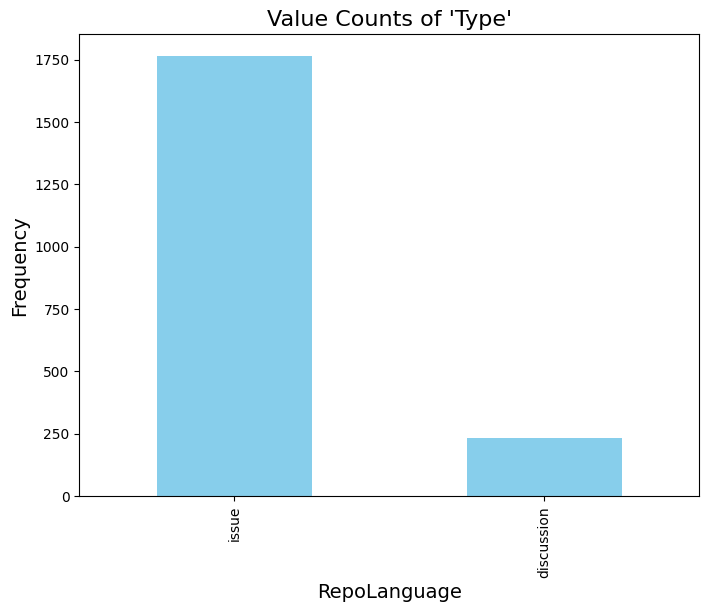

In [8]:
# view the distribution of Type
transformed_df["Type"].value_counts().sort_values(ascending=False).plot(kind="bar", color="skyblue", figsize=(8, 6))

plt.title("Value Counts of 'Type'", fontsize=16)
plt.xlabel("RepoLanguage", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

transformed_df["Type"].value_counts().sort_values(ascending=False)

RepoLanguage
Python                 506
TypeScript             303
JavaScript             208
Java                   130
C++                    101
HTML                    73
PHP                     72
C                       57
Rust                    43
C#                      40
Jupyter Notebook        38
Ruby                    29
Vue                     26
Go                      26
CSS                     22
Swift                   16
Shell                   15
Emacs Lisp              10
Kotlin                  10
Game Maker Language      8
Astro                    7
PLpgSQL                  6
Objective-C              6
Groovy                   6
Makefile                 6
Clojure                  6
Zig                      6
TSQL                     6
Solidity                 6
SystemVerilog            6
PowerShell               3
Perl                     3
F#                       3
MATLAB                   2
HCL                      1
Name: count, dtype: int64

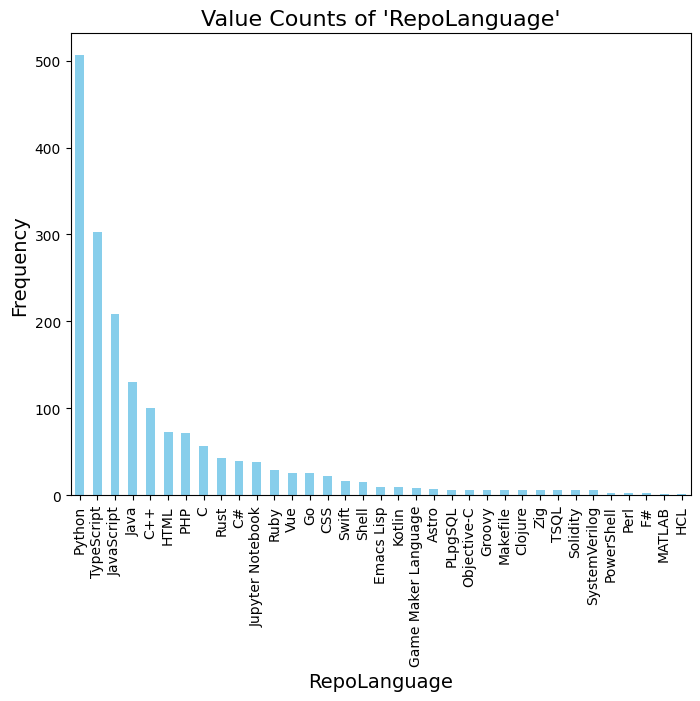

In [9]:
# view the distribution of RepoLanguage
transformed_df["RepoLanguage"].value_counts().sort_values(ascending=False).plot(kind="bar", color="skyblue", figsize=(8, 6))

plt.title("Value Counts of 'RepoLanguage'", fontsize=16)
plt.xlabel("RepoLanguage", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

transformed_df["RepoLanguage"].value_counts().sort_values(ascending=False)

Number
1        124
2        100
4         81
5         60
3         55
        ... 
548        1
3355       1
2164       1
98         1
13219      1
Name: count, Length: 227, dtype: int64

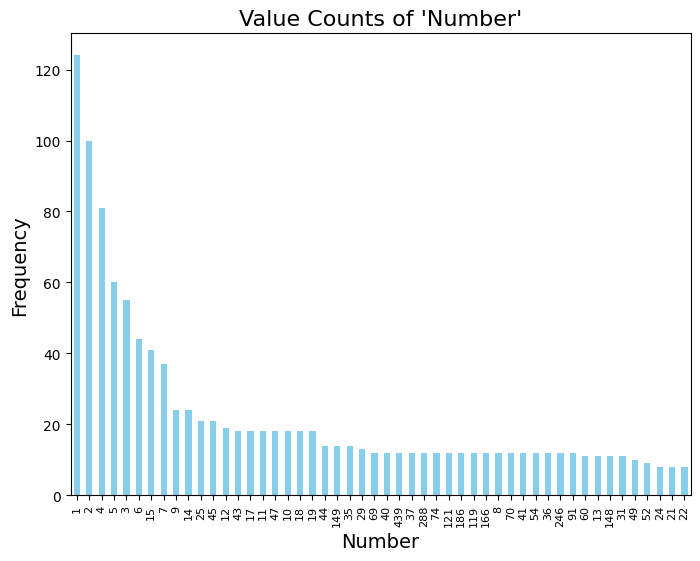

In [10]:
# view the distribution of Top 50 frequnt Number
transformed_df["Number"].value_counts().sort_values(ascending=False).head(50).plot(kind="bar", color="skyblue", figsize=(8, 6))

plt.title("Value Counts of 'Number'", fontsize=16)
plt.xlabel("Number", fontsize=14)
plt.xticks(fontsize=8, rotation=90)
plt.ylabel("Frequency", fontsize=14)
transformed_df["Number"].value_counts().sort_values(ascending=False)

UpvoteCount
0     1782
1      168
2       18
3       10
4        7
17       6
5        6
7        1
Name: count, dtype: int64

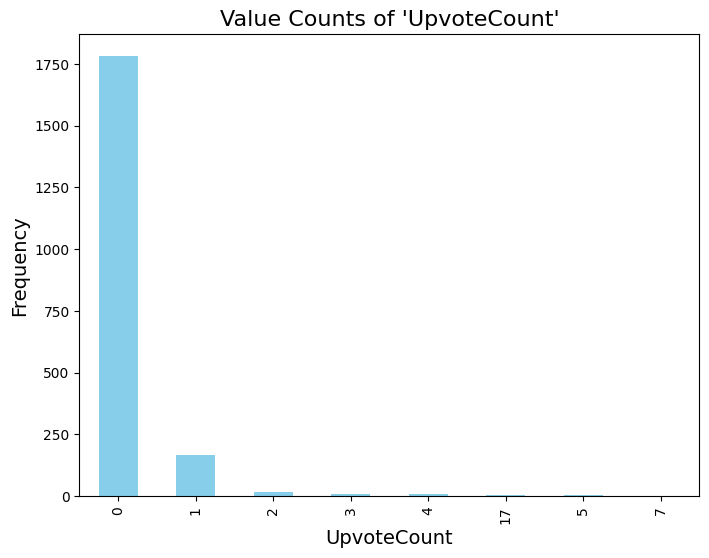

In [11]:
# view the distribution of UpvoteCount
transformed_df["UpvoteCount"].value_counts().sort_values(ascending=False).plot(kind="bar", color="skyblue", figsize=(8, 6))

plt.title("Value Counts of 'UpvoteCount'", fontsize=16)
plt.xlabel("UpvoteCount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

transformed_df["UpvoteCount"].value_counts().sort_values(ascending=False)

Conversations_num
1     566
2     395
3     191
0     165
4     128
5     115
6      88
10     52
7      45
8      34
9      32
14     23
13     19
20     18
22     15
12     13
24     12
30     12
16     10
11      7
51      6
46      6
19      6
23      6
35      6
28      6
88      6
66      4
36      4
18      2
69      2
42      2
21      2
Name: count, dtype: int64

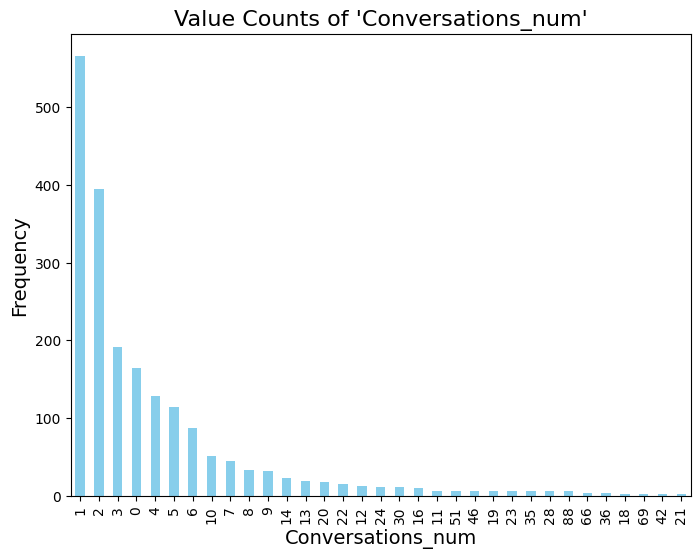

In [12]:
# view the distribution of Conversations_num
transformed_df["Conversations_num"].value_counts().sort_values(ascending=False).plot(kind="bar", color="skyblue", figsize=(8, 6))

plt.title("Value Counts of 'Conversations_num'", fontsize=16)
plt.xlabel("Conversations_num", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

transformed_df["Conversations_num"].value_counts().sort_values(ascending=False)